# Homework 5: Deep Learning for NLP 

The goals of this assignment are: 
1. Understand why deep learning can be beneficial for NLP classification tasks
2. Implement simple computation graphs by hand
3. Implement and train a deep averaging network with real-world data. 

## Organization and Instructions
Execute the code cells in Part 1 to understand the background for this assignment. You will not need to modify or add anything to Part 1. Part 2 is where your solution begins.

**Part 1: Background.** 
- 1A. Environment set-up 
- 1B. Data exploration 

**Part 2: Your implementation.** 
- 2A. Limitations of linear models 
- 2B. Computation graphs 
- 2C. Leaky ReLUs
- 2D. Deep averaging networks  

**(Optional) Part 3: Extra Credit.** 
Extra credit can only help you and will not hurt you. At the end of the semester, if you have a borderline grade, your grade could be increased given your efforts on extra credit. This section is intended to be open-ended and challenge you. We suggest you only attempt this section after you have completed all other parts and are satisifed with your submission.

**Addtional instructions.** 
- Your submitted solution and code must be yours alone. Copying and pasting a solution from the internet or another source is considered a violation of the honor code. 
- However, you can talk to classmates about *high-level* approaches. In the **Process Reporting** section, record the names of any classmates you spoke with about this assignment. 

**Evaluation.** Your solution will be evaluated on a mix of: 
- Unit tests
- Accuracy on the held-out test set. 
- Manually-graded free response questions. 

**Grading.**

- Part 2A.
    - **5 points (autograded).** Unit test that your `train_logistic_regression_sklearn()` function is obtaining the correct accuracy. 
    - **2 points (manually graded).** We will manually grade your answer to the free response question for 2A. 
- Part 2B. 
    - **5 points (autograded).** Unit test that your `f_forward_backward()` function is getting the correct results. 
- Part 2C.
    - **5 points (autograded).** Unit test that your `leaky_relu_forward_backward()` function is getting the correct results. 
    - **2 points (manually graded).** We will manually grade your answer to the free response question for 2C.
- Part 2D.
    - **5 points (autograded).** Unit tests for `create_word_indices()`.
    - **2.5 points (autograded).** Unit tests for `truncate()`. 
    - **2.5 points (autograded).** Unit tests for `pad()`.
    - **10 points (autograded).** Accuracy on the Yelp training set. 
    - **10 points (autograded).** Accuracy on the Yelp validation set. 
    - **10 points (autograded).** Accuracy on the Yelp test set.
    
For all the accuracy portions in Part 2D, you aim is to get at least 0.51 accuracy. For each `split`, your points will be calculated as 

```
(1 -(0.51 - min(accuracy on split, 0.51))/0.51) * 10 points 
```

This is a very generous accuracy requirement and we encourage you to work on the extra credit to challenge yourself to get a higher accuracy on this task. 

### 1A. Environment Set-up 

If you set-up your conda environment correctly in HW0, you should see `Python [conda env:cs375]` as the kernel in the upper right-hand corner of the Jupyter webpage you are currently on. Run the cell below to make sure your environment is correctly installed. 

In [1]:
# Environment check 
# Return to HW0 if you run into errors in this cell 
# Do not modify this cell 
import os
assert os.environ['CONDA_DEFAULT_ENV'] == "cs375"

import sys
assert sys.version_info.major == 3 and sys.version_info.minor == 8

If there are any errors after running the cell above, return to the instructions from `HW0`. If you are still having difficulty, reach out to the instructor or TAs via Piazza. 

#### Installing Pytorch 
We tested the following Pytorch installation for Macs. For Windows users, we may need to find a workaround together. 

Steps: 
1. Open a terminal. 
2. Activate your cs375 environment via the following terminal command:
    ```
    conda activate cs375
    ```
3. Install pytorch by typing via the following terminal command:
    ```
    conda install pytorch 
    ```

In [2]:
# Execute this cell to make sure you implemented the steps above correctly
import torch
import torch.nn as nn

In [3]:
print('Pytorch version =', torch.__version__)
# Mac users who install correctly with conda, we see 1.12.1

Pytorch version = 1.12.1


#### Installing other packages

In [4]:
# Import necessary modules for this assignment 
# Do not modify this cell 
import numpy as np
from typing import List, Dict, Union, Tuple
import sklearn 
from sklearn import linear_model
from gensim.models.keyedvectors import KeyedVectors
import matplotlib.pyplot as plt
import util #check out util.py in this repository for the helper functions we've implemented for you 

**Note:** In this assignment, you are **NOT** allowed to import or use any other packages outside the Python standard and the ones we imported above.

This means you should not use any other functions from `spaCy`, `NLTK`, `gensim`, or `scikit-learn`, even though those are provided in the conda environment we set up for you. If your solution uses any such extra dependencies it will fail the autograder.

### 1B. Data Exploration

#### Toy data 
We will use the following toy data for a few questions in this assignement. 

Here, the rows in X are examples but the columns in X are *not* words like we've seen so far. Instead, these columns are two *features*: 
- Average sentiment of words in a sentence 
- Sarcasm level in sentence 

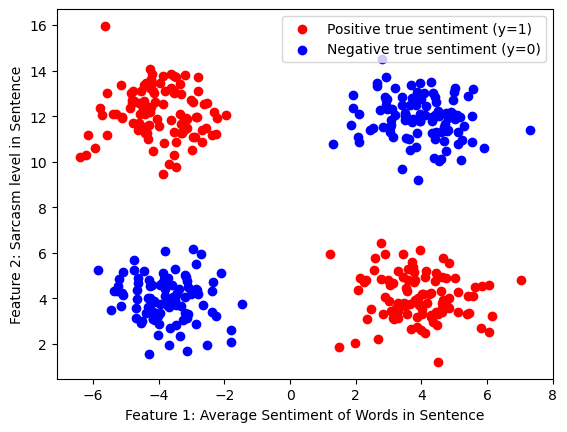

In [5]:
# Run this cell to construct and plot this toy data 
X_toy, y_toy = util.generate_2d_xor_dataset()
plt = util.plot_2d_dataset_points(X_toy, y_toy);

#### Yelp data 

Later in this assignment you will use a dataset of real-world Yelp reviews. 

In [6]:
# Run this cell to load Yelp data
train_examples, train_labels = util.load_dataset("./data/yelp/train.csv")
dev_examples, dev_labels = util.load_dataset("./data/yelp/dev.csv")

Each element in `train_examples` is a Yelp review that we've preprocessed into a list of words. We've already removed punctuation, segmented the words, and converted them all to lower case for you, to make them easier to work with.

Each element in `train_labels` is the review's corresponding positive/negative label. We've transformed the original star ratings into two labels (0 or 1) by collapsing 1 and 2-star reviews into the negative class (label 0) and 4 and 5-star reviews into the positive class (label 1). We ignore 3-star reviews for simplicity.

Here, `dev_examples` and `dev_labels` are a separate development set with the exact same format.

In [7]:
# Look at a single training example
" ".join(train_examples[0])

'taste wise this is one of the best if not the best coffee ive ever had its like im back in europe and the taste is so different and to make the experience even better the latte art is beautiful and the atmosphere is very relaxed and good for studying its just too bad the location is so bad for me personally but its sometimes worth the hour of public transportation so that i can get quality work done'

In [8]:
# Look at that example's label
train_labels[0]

1

In [9]:
#Another
" ".join(train_examples[4])

'being near my house and having seen it in the morning i asked my wife to bring me two sandwiches one chicken and one beef fro dinner its literally 50 meters away from our house and my wife had the car the sandwiches were dead cold and the sauce drizzled by someone who wants a sauce bottle to last a month or even two they added an entry to my list of cheap both were average tasting and after two bites went straight to the garbage carrot shreds and kalamata olives in a chicken sandwich i wonder where they brought their chef from anyways spare yourself the misery of disappointment and skip this place'

In [10]:
#Another
train_labels[4]

0

### 2A. Limitations of linear models 
The goals of this part are 
- To understand the limitations of linear models like Logistic Regression. 
- To practice using `sklearn`, a package which implements many machine learning models like Logistic Regression. Many of you will likely want to use `sklearn` for your final projects.  

Below, we'll use sklearn's Logistic Regression model 
```
logistic_regression_classifier = sklearn.linear_model.LogisticRegression(penalty=None)
```

Read more about this model [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). 

In your implementation of the `train_logistic_regression_sklearn()` function below, chose among the following methods from the `sklearn` documentation to train your logistic regression classifier. 

<div>
<img src="./imgs/logreg-methods.png" width="400"/>
</div>

In [21]:
def train_logistic_regression_sklearn(X: np.ndarray, y: np.ndarray) -> Tuple[sklearn.linear_model._logistic.LogisticRegression, float]:
    """
    Arguments: 
        - X (np.ndarray): Rows are examples, columns are "features", 
                        e.g., in our toy data above, one feature is average sentiment 
                        and the other feature is sarcasm level in the sentence. 
        - y (np.ndarray): Each element is a class label corresponding to the example in X 
                        e.g., in our toy data above,  
        
    Returns: As a tuple with 
            - First element of tuple: trained sklearn model object 
            - Second element of tuple: accuracy on the training set (float) 
        
    Hints: 
        - This function should be pretty simple if you correctly choose and utilize the sklearn Logistic Regresion
        methods from the screen shot above 
        - Make sure to check the type of the accuracy you return 
    """
    # Check to make sure inputs are correct 
    assert X.shape[0] == y.shape[0]
    
    # Intialize the sklearn model (no need to modify)
    logistic_regression_classifier = sklearn.linear_model.LogisticRegression(penalty=None)

    # CODE START
    return (logistic_regression_classifier.fit(X,y), 
            logistic_regression_classifier.score(X,y).item()) # Native numpy method to return Python float
    # CODE END 

In [22]:
# We reshape y_toy slightly to correspond to the form sklearn requires 
print('y_toy original shape =', y_toy.shape)
y_toy_reshape = y_toy.reshape(-1) # reshape 
print('new shape =', y_toy_reshape.shape)

y_toy original shape = (400, 1)
new shape = (400,)


In [23]:
# Use your function to train on toy data 
clf, acc = train_logistic_regression_sklearn(X_toy, y_toy_reshape)

In [24]:
# type checks 
assert type(clf) == linear_model._logistic.LogisticRegression
assert type(acc) == float

In [25]:
print("Accuracy of logistic regression classifier on toy data = ", acc)

Accuracy of logistic regression classifier on toy data =  0.5125


Below, we have provided you with a function that shades the predictions your trained classifier makes. In other words, the area shaded red is where your trained classifier predicts positive sentiment labels and the area shaded blue is where your trained classifier predicts negative sentiment labels. 

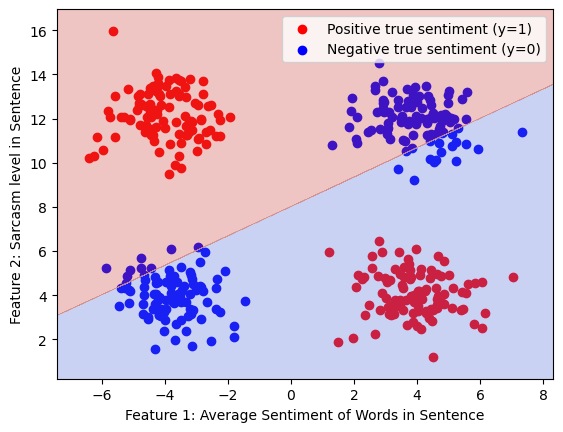

In [26]:
plt = util.plot_points_with_classifier_predictions(X_toy, y_toy, clf);

#### (2 points) Manual response

Why is the Logistic Regression classifier you trained above performing poorly? 

Logistic Regression is fundamentally a linear classifier: as we can see from the plot, it makes predictions along a straight line. Our data is non-linear, and so no linear classifier will have good performance. As we've discussed in class, we then need a deep learning network. 

### 2B. Computation graphs

Recall from lecture, *computation graphs* are visual representations of functions. Nodes in the graph receive inputs and we calculate both the (1) output value and (2) local gradient with respect to its output at each node. 

Let's implement the forward and backward pass for the following function: 
```
f(x, y, z) = max(0, x*y) 
```

In [33]:
def f_forward_backward(x: float, y: float, z:float) -> dict: 
    """
    Implements the forward and backward (gradient) pass 
    for the following function
    
    f(x, y, z) = max(0, x*y) 
    
    NOTE: You are only allowed to use numpy in this function.
    You are NOT allowed to use torch (or any other package). 
    
    Hints:
        - It may be helpful to review what we did in lecture. 
        - It may be helpful for you to work this out on paper first. 
    """
    #Initalize with None's what the function will return 
    result = {"f_forward": None, 
                "df_dx": None,
                "df_dy": None, 
                "df_dz": None}
    
    # CODE START
    a = x*y
    result["f_forward"] = max(0, a)
    if result["f_forward"]:
        df_da = 1
    else:
        df_da = 0

    result["df_dx"] = y * df_da
    result["df_dy"] = x * df_da
    result["df_dz"] = 0
    # CODE END 
    return result 

In [34]:
# Check that the following matches what you calculate on paper 
f_forward_backward(2, 1, -4)

{'f_forward': 2, 'df_dx': 1, 'df_dy': 2, 'df_dz': 0}

In [35]:
# Check that the following matches what you calculate on paper 
f_forward_backward(2, -1, -4)

{'f_forward': 0, 'df_dx': 0, 'df_dy': 0, 'df_dz': 0}

###  2C. Leaky ReLU

The function you implemented in Part 2B is very simlar to a `ReLU`, one of the nonlinear activation functions we discussed during lecture.  

In practice, most people building deep learning architectures use a `LeakyReLU` as the nonlinear activation function. This activation function takes the following form: 

$$ \text{LeakyReLU}(u) = \begin{cases}
u &\text{ if } u \ge 0 \\
\text{negative_slope} \cdot u &\text{ otherwise}
\end{cases}
$$

<div>
<img src="./imgs/LeakyReLU.png" width="300"/>
</div>

![](path-to-image)

In the function below, implement the forward and backward pass of the `Leaky ReLU`. 

In [43]:
def leaky_relu_forward_backward(u:float, negative_slope: float=0.1) -> dict: 
    """
    This function implements the Leaky ReLU shown above. 
    
    Arguments: 
        - u (float): the input value to the Leaky ReLU
        - negative_slope (float): the slope for values of u that are less than 0 
    
    Returns: 
        - result (dict): results of the forward pass given the input
                variable and the partial derivatives of the forward pass with respect
                to each input variable 
                
    NOTE: You are only allowed to use numpy in this function.
    You are NOT allowed to use torch (or any other package).
    
    Hints: 
        - Most likely, you will want to work this out on paper first.  
    """
    result = {"forward": None, #result of the forward pass
              "df_du": None}
    
    # CODE START
    if u >= 0:
        result["forward"] = u
        result["df_du"] = 1
    else:
        result["forward"] = negative_slope * u
        result["df_du"] = negative_slope
    # CODE END 
    
    return result

We're not providing you unit tests in this notebook for your LeakyReLU. Try writing some of your own to test your function! While these will not be graded, they'll help you become better at testing code and potentially help you pass the autograder. 

In [44]:
# TODO: write your own unit tests for LeakyReLU function here. 
assert leaky_relu_forward_backward(-2) == {'forward': -0.2, 'df_du': 0.1}
assert leaky_relu_forward_backward(1) == {'forward': 1, 'df_du': 1}
assert leaky_relu_forward_backward(0) == {'forward': 0, 'df_du': 1}
assert leaky_relu_forward_backward(-2, negative_slope=0.5) == {'forward': -1, 'df_du': 0.5}
assert leaky_relu_forward_backward(1, negative_slope=0.5) == {'forward': 1, 'df_du': 1}
assert leaky_relu_forward_backward(-2, negative_slope=10) == {'forward': -20, 'df_du': 10}
assert leaky_relu_forward_backward(1, negative_slope=10) == {'forward': 1, 'df_du': 1}

#### (2 points) Manual response

Why would people designing deep learning architectures prefer Leaky ReLU over ReLUs as nonlinear activation functions? 

ReLUs do not let us distinguish between negative values, as they all are evaluated to a constant. In the context of prediction however, it may very well be the case that negative values have different probabilities that we want to distinguish between. Leaky ReLUs preserve some notion of order between negative values, allowing for this.

### 2D. Deep Averaging Networks in Pytorch 

In this part, you will implement Deep Averaging Networks, a simple feedforward neural network that uses dense word embeddings as input. You can read more about this model in [this paper](https://people.cs.umass.edu/~miyyer/pubs/2015_acl_dan.pdf).

[Pytorch](https://pytorch.org/) is a Python package optimized for automatic differentiation and deep learnng. In other words, the package implements the backwards pass (the gradients) for you if you specify the forward pass correctly.

Recall, the forward pass of Deep Averaging Networks which we discussed during lecture: 

<div>
<img src="./imgs/dan.png" width="300"/>
</div>

In the figure above,   
- Each $\vec{v}$ is a dense word embedding that thas been pre-trained on another corpus (e.g. Wikipedia). 
- $g$ is a non-linear activation function. In your implementation, you will use [Leaky ReLUs implemented with Pytorch](https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html). 

A few more notes: 
- The embeddings are *frozen* meaning the gradients do not pass back through them. 
- The output of your forward pass should be a *log probability* for numerical stability.
- Implement a **dropout layer** (Pytorch documentation [here](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)) after the word embeddings but before the average (the authors call this "word dropout"). Also use dropout after calculating both $z_1$ and $z_2$.  

#### Processing data 

First, we'll need a little more data wrangling to get the Yelp data into a format for Pytorch. 

In [45]:
# We'll use the same GloVe embeddings you used for HW 4 
embeddings = KeyedVectors.load_word2vec_format("./data/embeddings/glove50_4k.txt", binary=False)
vocab2indx = dict(embeddings.key_to_index)
idx2vocab = list(embeddings.index_to_key)
embed_array = embeddings.vectors # matrix of dense word embeddings 
                                 # rows: a word 
                                 # columns: dimensions (50) of the dense embeddings
print("Size of embedding vocab = ", len(idx2vocab))

Size of embedding vocab =  4196


In [46]:
# vocab2idx above is a dictionary 
# keys: strings corresponding to words in the vocab
# values: the "index" of a word, i.e., an int corresponding to the row index for the embedding in embed_array
king_idx = vocab2indx["king"]
king_idx

691

In [47]:
embed_array[king_idx]

array([ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
       -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
       -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
       -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
        0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
        1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
        0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
       -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
       -0.64426 , -0.51042 ], dtype=float32)

We'll add an out-of-vocabulary (`"<OOV>"`) symbol to the vocabulary and initalize it as the vector for "the" so it does not affect the embedding average in our deep learning network. 

In [48]:
def add_the_embedding(embed_array, vocab2indx, embedding_dim=50): 
    """
    Adds "the" embedding to the embed_array matrix
    """
    the_embedding = embed_array[vocab2indx["the"]]
    out = np.vstack((embed_array, the_embedding))
    return out

In [49]:
# Add <OOV> symbol 
new_oov_entry = len(embeddings)
idx2vocab += ["<OOV>"]
vocab2indx["<OOV>"] = new_oov_entry
embed_array_w_oov = add_the_embedding(embed_array, vocab2indx)

In [50]:
# Check we've successfully added a row to our embed_array matrix and an entry to idx2vocab
# Hints: if you're getting errors here you may have run the cell with += above too many times 
    # try restarting your kernel and running again 
assert embed_array_w_oov.shape == (embed_array.shape[0]+1, embed_array.shape[1])
assert len(idx2vocab) == len(embeddings) + 1

Now we need to convert tokens into indices in the `embed_array`. Essentially, this will tell your Pytorch implementation which row of `embed_array` to use as the embedding for a word. 

In [60]:
def create_word_indices(tokens: List[str], vocab2indx: dict) -> List[int]: 
    """
    For each example, translate each token into its corresponding index from vocab2indx
    
    Replace words not in the vocabulary with the symbol "<OOV>" 
        which stands for 'out of vocabulary'
        
    Arguments: 
       - tokens (List[str]): list of strings of tokens 
       - vocab2indx (dict): each vocabulary word as strings and its corresponding int index 
                           for the embeddings 
                           
    Returns: 
        - (List[int]): list of integers
    """ 
    # CODE START
    
    def index_of(token: str) -> int:
        """Helper function to handle words not in vocabulary"""
        try:
            return vocab2indx[token]
        except KeyError:
            return vocab2indx["<OOV>"]
    
    return [index_of(token) for token in tokens]
    # CODE END 

In [61]:
#Unit test 1
toks1 = "this is great".split()
out1 = create_word_indices(toks1, vocab2indx)

In [62]:
# You should get [37, 14, 353]
out1

[37, 14, 353]

In [63]:
# Unit test 2 
toks2 = "this is baloney".split()
out2 = create_word_indices(toks2, vocab2indx)

In [64]:
# You should get [37, 14, 4196]
# Hint if incorrect: make sure you're handling OOVs properly
out2

[37, 14, 4196]

For computational efficiency, Pytorch requires that all inputs in a batch be the same length. Often, different pices of text have different lengths (e.g. different number of words in a sentence) so we must make the following modifications:  
- `truncate`: Given a maximum length (set by the you), we truncate the last part of the sequence. While we lose information, with a large enough maximum length, we can still approximate the information in each example/sentence even when it's truncated. 
- `pad`: Given inputs that are less than the maximum length, we concatenate the input sequence with a special pad token, `"<PAD>"`, the number of times it takes to get it to the maximum length. 

In [67]:
def truncate(original_indices_list: list, maximum_length=100) -> list: 
    """
    Truncates the original_indices_list to the maximum_length
    """
    # CODE START
    return original_indices_list[:maximum_length]
    # CODE END 

In [68]:
# Check that your truncate works on this toy example 
toy_example = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
truncate(toy_example, maximum_length=5)

[1, 2, 3, 4, 5]

Now let's pad. 

In [69]:
# Add <PAD> symbol (also as embedding for the word type "the")
new_pad_entry = len(idx2vocab)
idx2vocab += ["<PAD>"]
vocab2indx["<PAD>"] = new_pad_entry
embed_array_w_oov_pad = add_the_embedding(embed_array_w_oov, vocab2indx)
print("Pad index = ", new_pad_entry)

Pad index =  4197


In [70]:
def pad(original_indices_list: list, pad_index: int, maximum_length=100) -> list: 
    """
    Given original_indices_list, concatenates the pad_index enough times 
    to make the list to maximum_length. 
    """
    # CODE START
    original_length = len(original_indices_list)
    if original_length >= maximum_length:
        return original_indices_list
    
    padding = [pad_index] * (maximum_length - original_length)
    return original_indices_list + padding
    # CODE END 

In [71]:
# Check that your implementation adds the pad index here 
toy_example1 = [1, 2, 3, 4]
pad(toy_example1, new_pad_entry, maximum_length=5)

[1, 2, 3, 4, 4197]

In [72]:
# Check that your implementation DOES NOT adds the pad index here 
toy_example2 = [1, 2, 3, 4, 5]
pad(toy_example2, new_pad_entry, maximum_length=5)

[1, 2, 3, 4, 5]

Let's now put all our processing together for one example.

In [73]:
train1_toks = train_examples[5]
print("Training example 1 tokens = ", train1_toks)
print()
print("Trianing example 1 length =", len(train1_toks))

Training example 1 tokens =  ['my', 'trip', 'to', 'see', 'do', 'meander', 'was', 'the', 'best', 'ive', 'ever', 'experienced', 'i', 'usually', 'leave', 'other', 'dentists', 'in', 'pain', 'but', 'i', 'felt', 'no', 'pain', 'at', 'all', 'everyone', 'at', 'the', 'office', 'was', 'nice', 'and', 'professional', 'most', 'importantly', 'i', 'love', 'the', 'way', 'my', 'teeth', 'look', 'and', 'would', 'highly', 'recommend', 'this', 'dentist', 'to', 'anyone', 'that', 'wants', 'a', 'smile', 'makeover']

Trianing example 1 length = 56


In [74]:
train1_indices = create_word_indices(train1_toks, vocab2indx)
print(len(train1_indices))
print("First five toks =", train1_indices[0:5])

56
First five toks = [192, 1305, 4, 253, 88]


In [75]:
# Check that converting back we get the correct word back  
idx2vocab[192]

'my'

In [76]:
# Double check your truncation is working correctly! 
train1_truncated = truncate(train1_indices, maximum_length=4)
print(train1_truncated)

[192, 1305, 4, 253]


Now we can convert all our training and dev examples. No need to modify the cells below, just run them. 

In [77]:
# No need to modify this function 
def convert_X(examples):
    MAXIMUM_LENGTH = 25
    
    X_list = []
    for one_train_example in examples: 
        one_train_indices = create_word_indices(one_train_example, vocab2indx)
        one_train_indices = truncate(one_train_indices, maximum_length=MAXIMUM_LENGTH)
        one_train_indices = pad(one_train_indices, new_pad_entry, maximum_length=MAXIMUM_LENGTH)
        X_list.append(one_train_indices)
        
    X = torch.LongTensor(X_list)
    return X

In [78]:
X_train = convert_X(train_examples)

In [79]:
print(X_train.shape)
assert X_train.shape[0] == len(train_examples)

torch.Size([39999, 25])


In [80]:
X_dev = convert_X(dev_examples)
print(X_dev.shape)

torch.Size([5000, 25])


In [81]:
Y_train = torch.LongTensor(train_labels)
assert Y_train.shape[0] == X_train.shape[0]

In [82]:
Y_dev = torch.LongTensor(dev_labels)
assert Y_dev.shape[0] == X_dev.shape[0]

#### Implementing the network 

It's now time to implement the network in Pytorch! 

Deep learning networks can be notoriously hard to debug. Here's some **suggestions** to help you: 
- Work out on paper what you're supposed to do given the description at the start of Part 2D. - Check-in with your classmates about high-level approaches and concepts

In [83]:
# Big hint: This is how you should use the frozen embedding layer
# Make sure you understand what the code is doing in this cell and the next one 
pretrained_embedding_matrix = embed_array_w_oov_pad
vecs = torch.FloatTensor(pretrained_embedding_matrix)
embed = nn.Embedding.from_pretrained(vecs, freeze=True)

In [84]:
# Two toy examples that we'll pass through the embedding layer. 
# Each example has 3 tokens which we converted into indices. 
toy2_input_indices = [[2548, 2876, 37], [3, 4, 5]]
toy2_input_tensor  = torch.LongTensor(toy2_input_indices)
toy2_embedded = embed(toy2_input_tensor)
print(toy2_embedded.shape)
assert toy2_embedded.shape[0] == len(toy2_input_indices) # number of example 
assert toy2_embedded.shape[1] == len(toy2_input_indices[0]) #number of tokens (will be equal to MAX LENGTH)
assert toy2_embedded.shape[2] == 50 # embedding dimension

torch.Size([2, 3, 50])


In [85]:
toy2_embedded[0][0] #first example, first token is a 50-dimensional embdding

tensor([-0.2583,  0.2076, -1.8089, -0.0046,  1.0020,  0.3087,  0.2349,  0.1395,
        -0.1646,  1.1608,  0.1298,  0.3970,  0.9664, -0.2247,  0.2064,  0.2237,
        -0.0431,  0.2684, -0.0902, -1.2130, -0.2094,  0.1958,  1.1608,  0.4107,
        -0.0887, -0.7722, -1.1368,  0.9858,  1.5428, -0.0568,  2.2402,  0.6353,
        -0.0726, -0.2385,  0.2905,  0.1291, -1.1139,  0.8975,  0.5548, -0.7760,
         0.7133,  0.0622, -0.1366,  0.1961,  0.5823,  1.5621,  0.2034,  0.2400,
        -0.0326,  0.2819])

Implement `__init__()` and `forward()` in the network below. 

In [135]:
class DeepAveragingNetwork(nn.Module):
    """
    Pytorch implementation for Deep Averaging Network for classification 
    """
    def __init__(self, num_classes, #number of labels / y-values
                     pretrained_embedding_matrix, #we'll pass in embed_array_w_oov_pad
                     embedding_dim: int, #architecture/pre-processing decision 
                     hidden_dim1: int, #architecture decision
                     hidden_dim2: int, #architecture decision 
                     leaky_relu_negative_slope: float, #hyperparameter
                     dropout_probability: float #hyperparameter
                ):
        """
        Create the network architecture. 
        
        Hints: 
        - Make sure all your dimesions of various layers work out correctly 
        """
        super().__init__()
        self.num_classes = num_classes 
        
        # TODO: implement your solution here 
        # CODE START
        self.pretrained_embedding_matrix = embed_array_w_oov_pad
        self.vecs = torch.FloatTensor(pretrained_embedding_matrix)
        self.embed = nn.Embedding.from_pretrained(vecs, freeze=True)
        ##############################################################
        self.hidden1 = nn.Linear(embedding_dim, hidden_dim1)
        self.hidden2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.p_hat = nn.Linear(hidden_dim2, self.num_classes)
        ##############################################################
        self.dropout = nn.Dropout(dropout_probability)
        self.leaky_relu = nn.LeakyReLU(leaky_relu_negative_slope)
        self.log_softmax = nn.LogSoftmax(dim=1)
        # CODE END 
        
        
    def forward(self, X_batch: torch.Tensor) -> torch.Tensor:
        """
        Given X_batch, make the forward pass through the network. 
        
        The output should be the predicted *log probabilities*. 
        
        Returns: 
            - (torch.Tensor): the log probabilites after the forward pass 
                The shape of this tensor should be (X_batch.shape[0], 2)
                
        Hints: 
            - Look at Pytorch's implemenation of .mean()
            - There should be NO for-loops in this method 
        """
        # TODO: implement your solution here 
        # CODE START
        X_batch_embedded = self.embed(X_batch)
        
        # Dropout layer, done before averaging
        X_batch_embedded = self.dropout(X_batch_embedded)
        # Creating average embedding
        av = torch.mean(X_batch_embedded, dim=1)
        
        # Activation layers, getting z2
        hid1 = self.hidden1(av)
        z1 = self.leaky_relu(hid1)
        hid2 = self.hidden2(z1)
        z2 = self.leaky_relu(hid2)
        
        # Final prediction
        out = self.p_hat(z2)
        log_probs = self.log_softmax(out)
        return log_probs
        # CODE END
        
    def train_model(self, X_train, Y_train, X_dev, Y_dev, loss_fn, optimizer, num_iterations, batch_size = 500, check_every=10, verbose=False): 
        """
        Method to train the model. 
        
        No need to modify this method. 
        """
        self.train() # tells nn.Module its in training mode 
                      # (important when we get to things like dropout)
            
        loss_history = [] #We'll record the loss for inspection
        train_accuracy = []
        dev_accuracy = []

        for t in range(num_iterations):
            if batch_size >= X_train.shape[0]: 
                X_batch = X_train
                Y_batch = Y_train
            else: #randomly choose batch_size number of examples 
                batch_indices = np.random.randint(X_train.shape[0], size=batch_size)
                X_batch = X_train[batch_indices]
                Y_batch = Y_train[batch_indices]

            
            # Forward pass 
            pred = self.forward(X_batch)
            loss = loss_fn(pred, Y_batch)

            #Backprop
            optimizer.zero_grad() # clears the gradients from the previous iteration
                                  # this step is important because otherwise Pytorch will 
                                  # *accumulate* gradients for all itereations (all backwards passes)
            loss.backward() # calculate gradients from forward step 
            optimizer.step() # gradient descent update equation 
            
            #Check the loss and train and dev accuracies every 
            if t % check_every == 0:
                loss_value = loss.item() # call .item() to detach from the tensor 
                loss_history.append(loss_value)
                
                #Check train accuracy (entire set, not just batch) 
                train_y_pred, _ = self.predict(X_train)
                train_acc = self.accuracy(train_y_pred, Y_train.detach().numpy()) 
                train_accuracy.append(train_acc)
                
                #Check dev accuracy (entire set, not just batch) 
                dev_y_pred, _ = self.predict(X_dev)
                dev_acc = self.accuracy(dev_y_pred, Y_dev.detach().numpy())
                dev_accuracy.append(dev_acc)
                
                if verbose: print(f"Iteration={t}, Loss={loss_value}")
                
        return loss_history, train_accuracy, dev_accuracy
    
    def predict(self, X): 
        """
        Method to make predictions given a trained model. 
        
        No need to modify this method. 
        """
        self.eval() # tells nn.Module its NOT in training mode 
                 # (important when we get to things like dropout)
    
        pred_log_probs = self.forward(X)
        
        
        if self.num_classes == 2: 
            log_pred_pos_class = pred_log_probs[:,1].detach().numpy() #get only the positive class 
            pred_pos_class = np.exp(log_pred_pos_class) #exp to undo the log 
            # decision threshold
            y_pred = np.zeros(X.shape[0])
            y_pred[pred_pos_class>= 0.5] = 1
            return y_pred, pred_pos_class
        
        else: 
            return pred_log_probs
    
    @staticmethod
    def accuracy(y_pred: np.ndarray, y_true: np.ndarray) -> float: 
        """
        Calculates accuracy. No need to modify this method. 
        """
        return np.mean(y_pred == y_true)

**Sanity check.** A good first step for debugging deep learning networks is to create a random `X_batch` and check that the syntax of the network is correct and the outputs are the correct shape and type. Run the cells below to perform this sanity check. 

In [99]:
# Random inputs to check syntax
X_batch = torch.randint(low=0, high=len(vocab2indx), size=(100, 10))

In [112]:
X_batch.shape

torch.Size([100, 10])

In [136]:
# Initalize model and run the forward pass 
model = DeepAveragingNetwork(2, embed_array_w_oov_pad,50, 20, 20, 0.01,0.1)
log_probs_out = model.forward(X_batch)

In [ ]:
# Run the cells below and make sure your network passes the checks 

In [137]:
assert type(log_probs_out) == torch.Tensor

In [138]:
assert log_probs_out.shape == (X_batch.shape[0], 2)

In [139]:
# Check that all your probabilities add to 1
log_probs_numpy = log_probs_out.detach().numpy()
probs = np.exp(log_probs_numpy)
np.sum(probs, axis=1)

array([1.        , 1.0000001 , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.9999999 , 0.9999999 ,
       1.        , 0.9999999 , 1.        , 1.        , 1.        ,
       0.9999999 , 1.        , 0.9999999 , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.0000001 , 1.        ,
       1.        , 1.        , 1.        , 0.99999994, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99999994, 1.        , 1.        , 1.0000001 , 1.        ,
       1.0000001 , 1.        , 1.        , 0.99999994, 1.        ,
       0.9999999 , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99999994, 1.        , 1.        , 1.     

**Training the full network.** Let's now run the network on real data. 

In [140]:
LEARNING_RATE = 1e-1
HIDDEN_DIM1 = 200 
HIDDEN_DIM2 = 100
LEAKY_RELU_NEG_SLOPE = 0.01
DROPOUT_PROB = 0.4 

In [141]:
#initalize
model = DeepAveragingNetwork(2,
                         embed_array_w_oov_pad,
                         50,
                         HIDDEN_DIM1, 
                         HIDDEN_DIM2, 
                         LEAKY_RELU_NEG_SLOPE,
                         DROPOUT_PROB) 

loss_fn= nn.NLLLoss() #For binary logistic regression 
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE) #stochastic gradient descent 

In [142]:
NUMBER_ITERATIONS = 300
loss_history, train_accuracy, dev_accuracy = model.train_model(X_train, Y_train, X_dev, Y_dev, 
                                                             loss_fn, optimizer, NUMBER_ITERATIONS, 
                                                             batch_size = 200,
                                                             check_every=50, verbose=False)

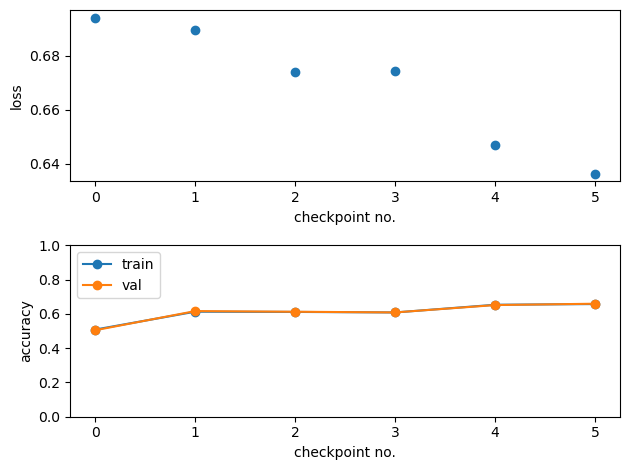

In [143]:
util.diagnostics_plot(loss_history, train_accuracy, dev_accuracy)

In [144]:
print("Baseline acc (predict majority class) =", np.mean(dev_labels))
print("Final train acc = ", train_accuracy[-1])
print("Final dev acc =", dev_accuracy[-1])

Baseline acc (predict majority class) = 0.5
Final train acc =  0.6570164254106353
Final dev acc = 0.659


There are many "engineering" pieces to try to make these accuracies better. If you're interested, we encourage you to try the extra credit below! 

### (Optional) 3. Extra credit 
*Extra credit can only help you and will not hurt you. At the end of the semester, if you have a borderline grade, your grade could be increased given your efforts on extra credit. This section is intended to be open-ended and challenge you. We suggest you only attempt this section after you have completed all other parts and are satisifed with your submission.*

Try to get a higher accuracy on the Yelp data using the Deep Averaging Network you implemented. Some suggestions: 
- Try a grid search over the hyperparameters. 
- Implement a [random layout rather than a grid layout](https://towardsdatascience.com/hyper-parameter-tuning-techniques-in-deep-learning-4dad592c63c8) for hyperparameter search. 
- Use the `gensim` package and use different pre-trained embeddings (try to get fewer OOVs).
- Change other preprocessing decisions (hint we implemented some decisions in capital letters; find these and change them). 
- Change the model architecture (e.g. try an LSTM or a transformer).
- Change the optimizer 

**Instructions for extra credit submission.**
We’re separating the extra credit from the normal submission so that (1) your extra credit does not affect your normal submission and (2) we do not break the memory limits on the Gradescope autograder.

To sumbit: 
1. Create a new jupyter notebook (.ipynb) file.
2. Write all your extra credit in this file.
3. Once you’re done, in the top menu bar make sure to `Kernel -> Restart -> RunAll`.
4. In the top menu bar, select` File -> Download as -> PDF via Latex (.pdf)`
5. Upload this `.pdf` to Gradescope under the appropriate extra credit assignment.

## Submission 

**Processing reporting.** Please record your answers to the questions below by writing directly in this Markdown cell.

If you talked with any of your classmates on this assignment please list their names here:

*DELETE AND PUT YOUR ANSWER HERE.*

Approximately how much time did you spend on this assignment:

*DELETE AND PUT YOUR ANSWER HERE.*

**Download zip.** Once you're satsified with your solution, save this file and run the cell below to automatically zip your file. This will produce `submission.zip` in the same folder as this file (same folder as `hw5.ipynb`). 

Submit `submission.zip` to Gradescope. 

*Note:* This script assumes that you have the `zip` utility installed and you can use `bash` on your system. If the cell below does not work you may need to zip your file manually. 

In [ ]:
%%bash

if [[ ! -f "./hw5.ipynb" ]]
then
    echo "WARNING: Did not find notebook in Jupyter working directory. Manual solution: go to File->Download .ipynb to download your notebok and other files, then zip them locally."
else
    echo "Found notebook file, creating submission zip..."
    zip -r submission.zip hw5.ipynb
fi